In [40]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

#Wykresy słowne
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

#mapa
import folium
import webbrowser
from IPython.display import display

#paleta kolorów
sns.set_palette("hls", 8)

df = pd.read_csv('/Users/mariazarnecka/Desktop/JA/Data_Science/InfoShare/Projekt/02/Data/restaurants.csv')
df_menu = pd.read_csv('/Users/mariazarnecka/Desktop/JA/Data_Science/InfoShare/Projekt/02/Data/restaurant-menus.csv')

In [2]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 694.9 kB/s eta 0:00:00a 0:00:01


In [4]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 309.3 kB/s eta 0:00:00a 0:00:01


In [7]:
df

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700
...,...,...,...,...,...,...,...,...,...,...,...
40222,40223,54,Mangia la pasta! (5610 N Interstate Hwy 35),4.8,500.0,"Pasta, Comfort Food, Italian, Group Friendly",$,"5610 N I35, Austin, TX, 78751",78751,30.316248,-97.708441
40223,40224,53,Wholly Cow Burgers (S Lamar),4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",$,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.242816,-97.783821
40224,40225,52,EurAsia Ramen 3,4.7,293.0,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",$,"5222 Burnet Road, Austin, TX, 78756",78756,30.324290,-97.740200
40225,40226,51,Austin's Habibi (5th St),4.7,208.0,"Mediterranean, Gluten Free Friendly, Allergy F...",$$,"817 W 5th St, Austin, TX, 78703",78703,30.269580,-97.753110


In [8]:
df_menu

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD
...,...,...,...,...,...
3375206,40227,Kid’s Mains,Lion Plate,BBQ skewer two pices and fantail shrimp two pi...,8.55 USD
3375207,40227,Beverages,Soft Drinks,NaN,1.95 USD
3375208,40227,Beverages,Iced Tea,NaN,1.95 USD
3375209,40227,Desserts,Sesame Balls (4 pcs),NaN,3.95 USD


In [12]:
df.id.nunique()

40227

In [14]:
df_menu.restaurant_id.nunique()

40141

In [16]:
df.isna().sum()

id                  0
position            0
name                0
score           17973
ratings         17973
category           23
price_range      6646
full_address      278
zip_code          287
lat                 0
lng                 0
dtype: int64

In [18]:
df_menu.isna().sum()

restaurant_id         0
category              0
name                  0
description      908297
price                 0
dtype: int64

<AxesSubplot:>

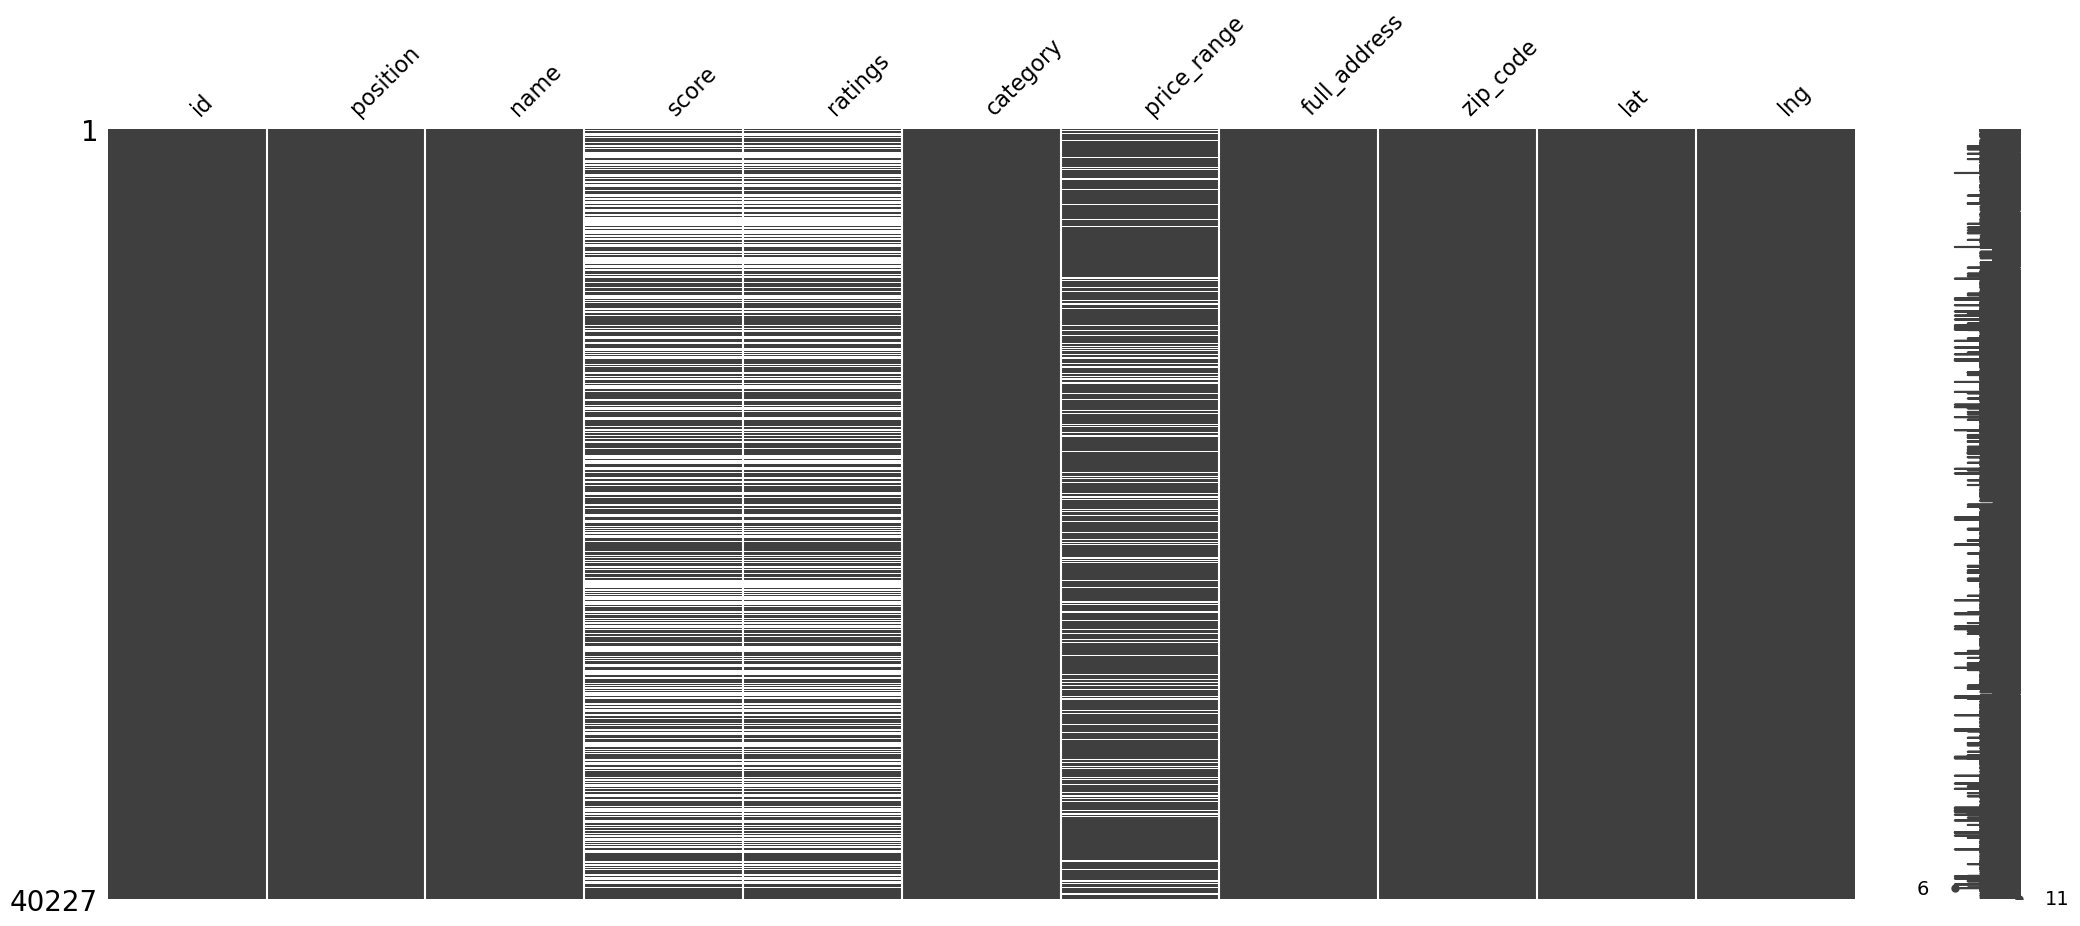

In [19]:
msno.matrix(df)

<AxesSubplot:>

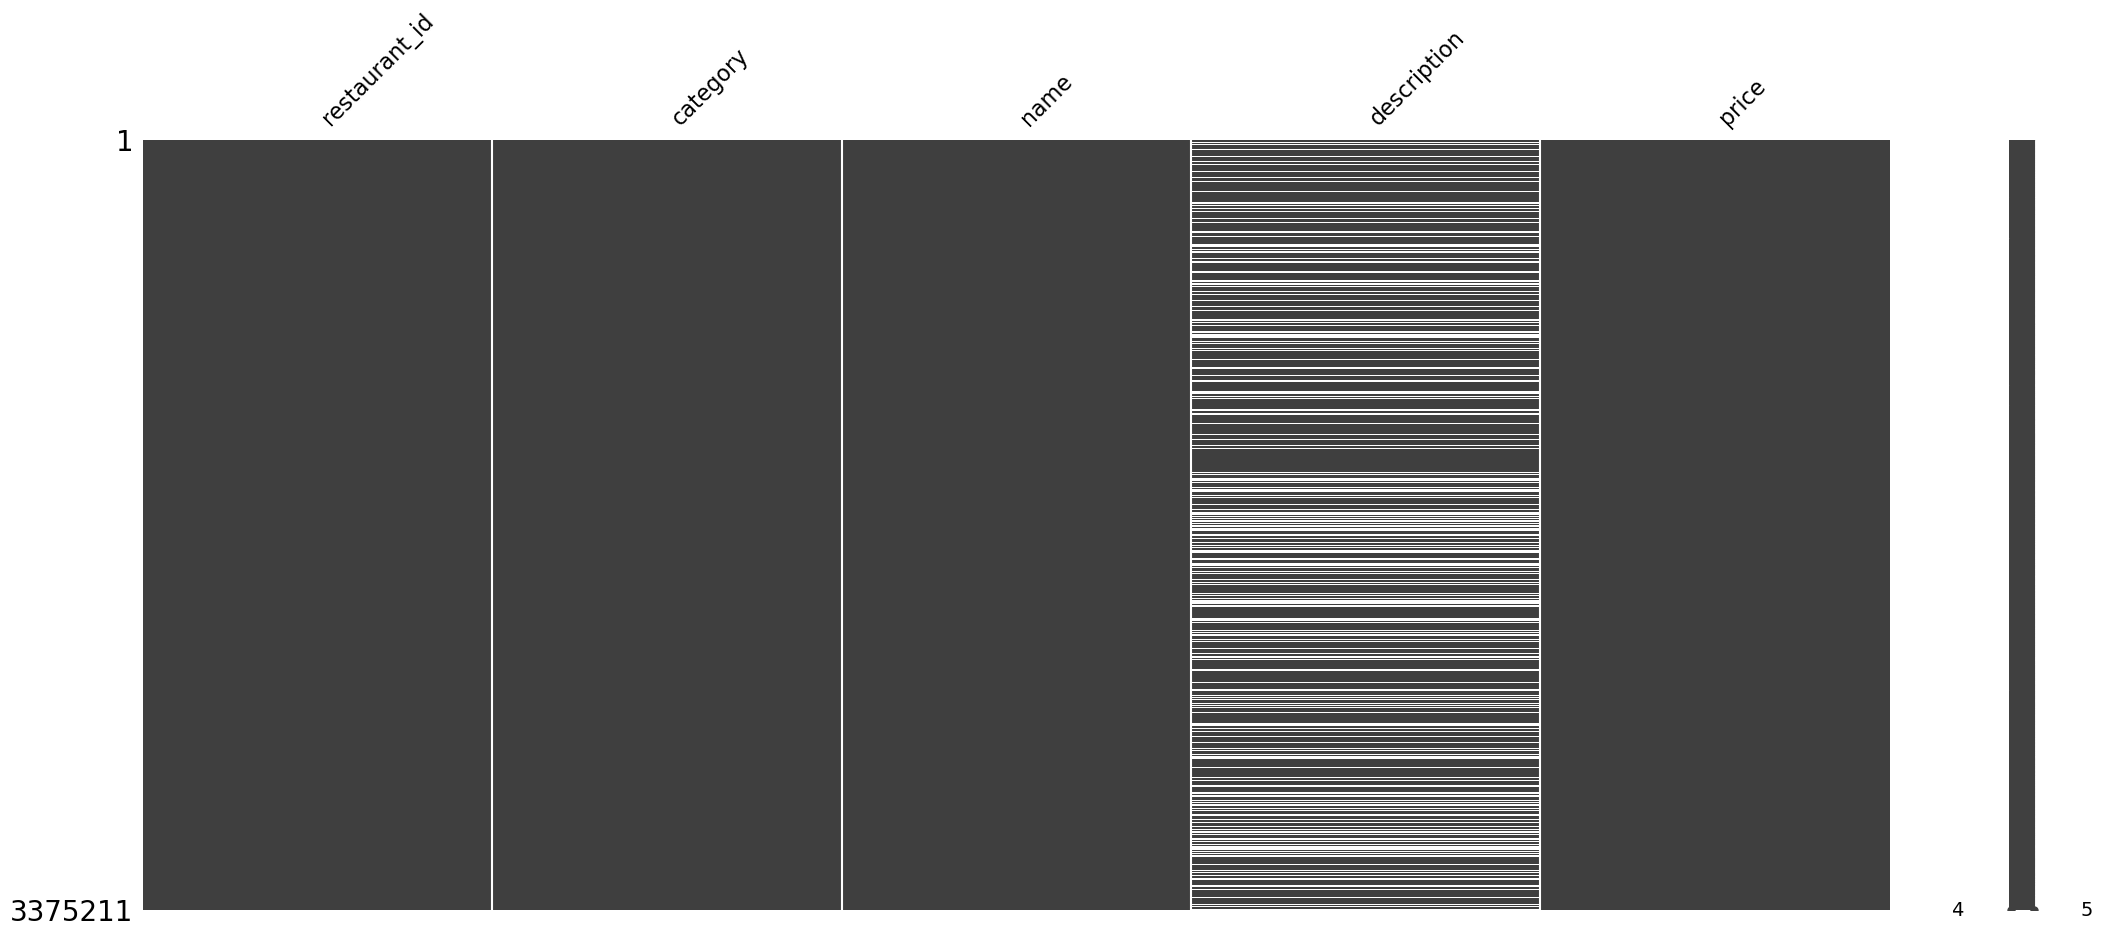

In [20]:
msno.matrix(df_menu)

In [22]:
df.dropna(inplace=True)

In [23]:
df_menu.drop(columns=['description'],inplace=True,axis=1)

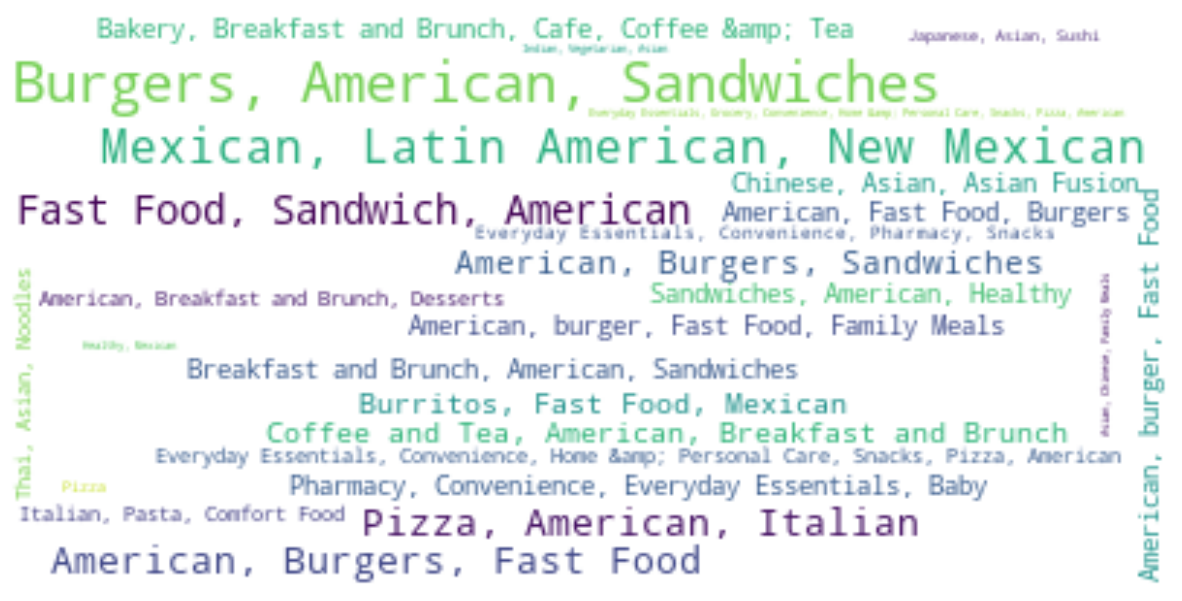

In [41]:
#najczęściej występijące kategorie dań wśród restauracji 

text = df['category'].value_counts().to_dict()
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate_from_frequencies(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
df['category'].value_counts()

American, Burgers, Fast Food                                                                                                                                            556
Burritos, Fast Food, Mexican                                                                                                                                            344
Burgers, American, Sandwiches                                                                                                                                           331
Fast Food, Sandwich, American                                                                                                                                           315
Mexican, Latin American, New Mexican                                                                                                                                    289
                                                                                                                                            

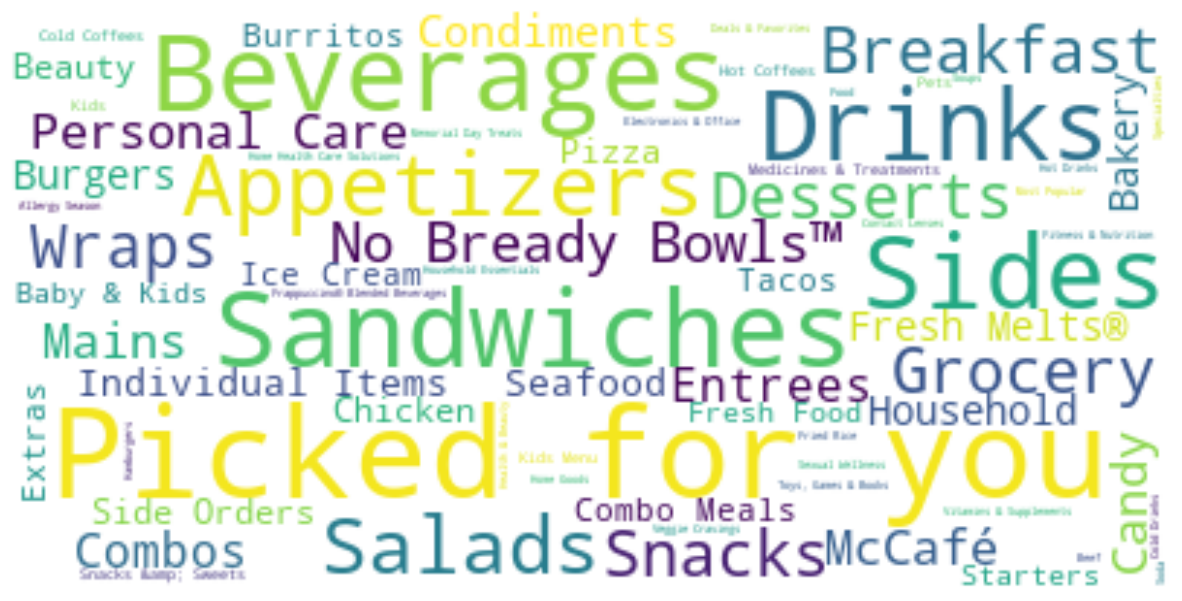

In [44]:
#typowe kategorie dań wśród restauracji
text = df_menu['category'].value_counts().to_dict()
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate_from_frequencies(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
df_menu['category'].value_counts()

Picked for you                145401
Beverages                     103391
Sandwiches                    102730
Sides                          93354
Drinks                         85904
                               ...  
Bar-B-Q Sandwiches                 1
Antipasti and Cheese Plate         1
New Boneless Wings                 1
Hoesly's Dogs                      1
Potato Pancakes                    1
Name: category, Length: 51753, dtype: int64

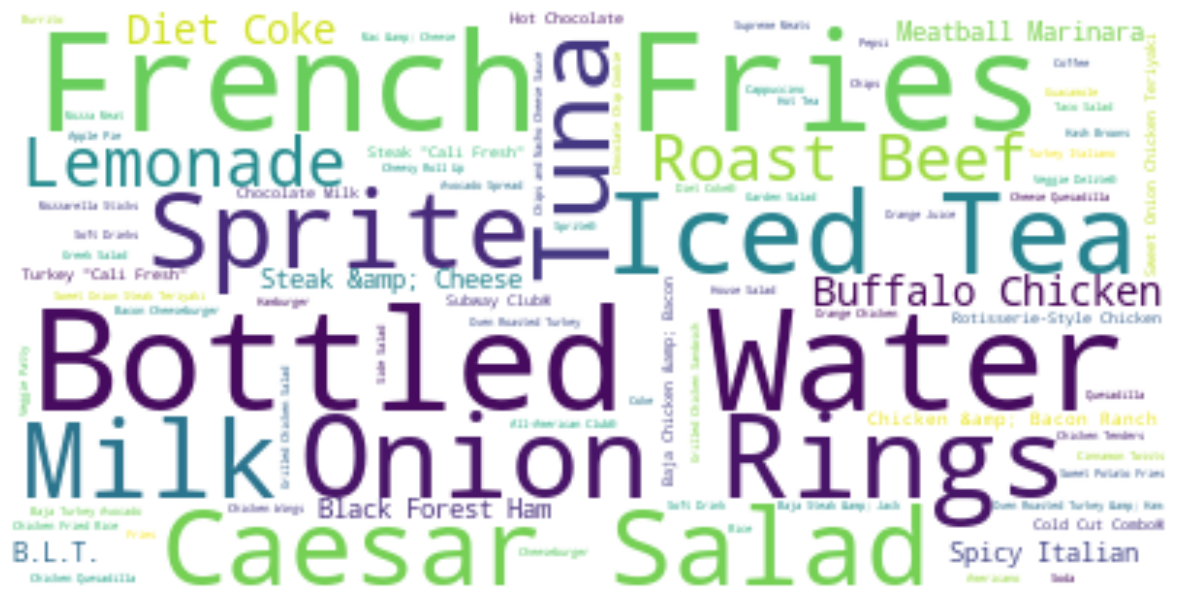

In [45]:
#Najczęściej kupowane produkty, dania
text = df_menu['name'].value_counts().to_dict()
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate_from_frequencies(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
df_menu['name'].value_counts()

Bottled Water                       5406
French Fries                        5114
Onion Rings                         3385
Iced Tea                            3276
Caesar Salad                        3108
                                    ... 
K2. Black Ice Tea 冰红茶                  1
K1. House Special Plum Juice 酸梅汤       1
J4. Shrimp Fried Rice 虾仁炒饭             1
J3. Chicken Fried Rice 鸡肉炒饭            1
Fried Biscuits (4 pcs)                 1
Name: name, Length: 669060, dtype: int64

In [34]:
#lokalizacja restauracji
from folium import plugins

m = folium.Map(height=500,location=[37.09024,-95.712891], zoom_start=4)

stationArr = df[['lat','lng']]

m.add_child(plugins.HeatMap(stationArr, radius=15))
m

In [47]:
df.nunique()

id              40227
position          300
name            38863
score              33
ratings           416
category        10647
price_range         4
full_address    35302
zip_code         2281
lat             36780
lng             36745
dtype: int64